<a href="https://colab.research.google.com/github/ParulSrivastava98/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**YES BANK STOCK CLOSING PRICE PREDICTION**


##***Problem Statement:-***

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

##***GIVEN DATA :-***
##**OPEN:** Open is the price at which the financial security opens in the market when trading begins. It may or may not be different from the previous day's.
##**HIGH:** It is the highest price at which the stock traded that day in the market.
##**LOW:** It is the lowest price at which the stock traded that day in the market.
##**CLOSE:** Close is the price at which the financial security closes in the market.
##**DATE:** monthly observation of stock is provided in the data.

##**Importing Libraries**

In [ ]:
##Libraries for handling dataframe
import pandas as pd
import numpy as np
from numpy import math

##Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
##Importing other important libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import  GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import  mean_squared_error ,mean_absolute_error, r2_score 

In [ ]:
##Importing data set of yes bank
df_ybs=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock/data_YesBank_StockPrices.csv')

##**EXPLORATORY DATA ANALYSIS**

In [ ]:
##Gives the first 10 rows of data
df_ybs.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
##Gives the last 10 rows of data
df_ybs.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
##Gives the count of rows and columns of data
df_ybs.shape

(185, 5)

In [ ]:
##Gives the necessary information
df_ybs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
##Gives the range of data
df_ybs.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
##Checking the null values in data frame
df_ybs.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
##Checking all the available columns
df_ybs.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
##Checking datatypes
df_ybs.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
##Converting into datetime type
df_ybs['Date'][0:10]


0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
5    Dec-05
6    Jan-06
7    Feb-06
8    Mar-06
9    Apr-06
Name: Date, dtype: object

In [ ]:
##Converting the datatype of column date which is object to datetime type
from datetime import date
from datetime import datetime

df_ybs['Date'] = df_ybs['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [ ]:
##Again check to see changes implemented or not
df_ybs.head(10)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [ ]:
##Checking the data types
df_ybs.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

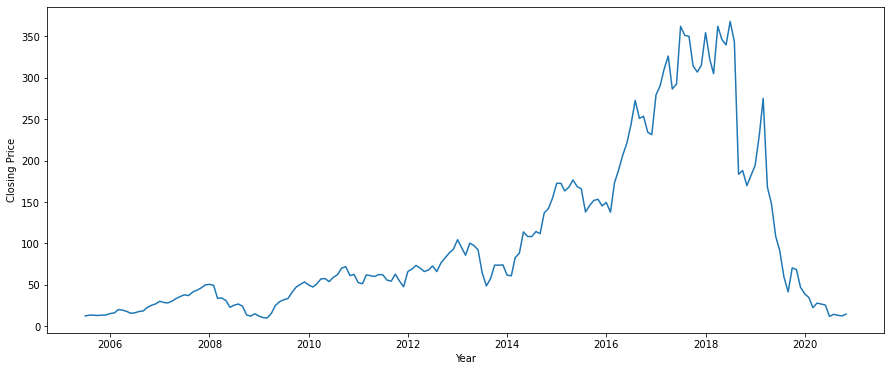

In [ ]:
##Plotting graph for closing price wrt year
df_ybs.set_index('Date',inplace=True)
plt.figure(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(df_ybs['Close'], label='Close Price history')


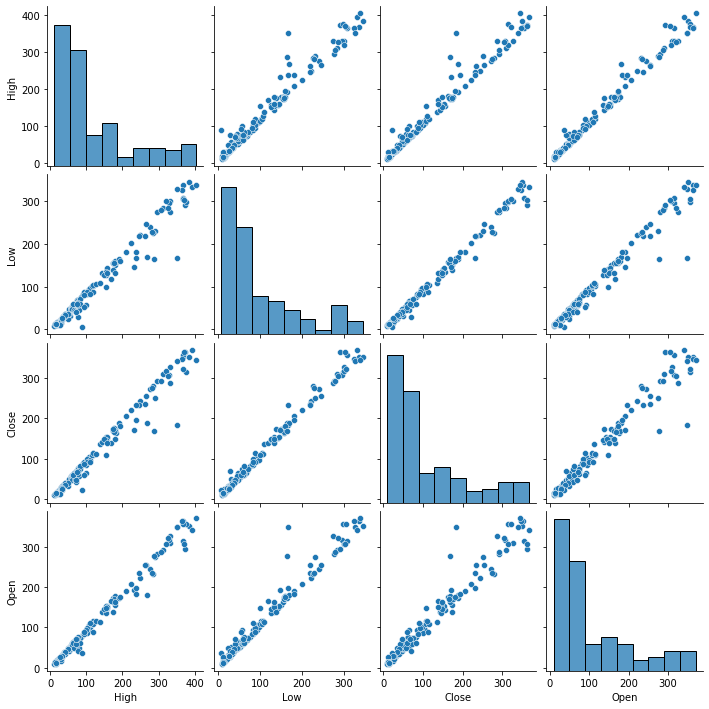

In [ ]:
##Pairplot showing correlation between variables 
sns.pairplot(df_ybs[['High','Low','Close','Open']])
plt.show()

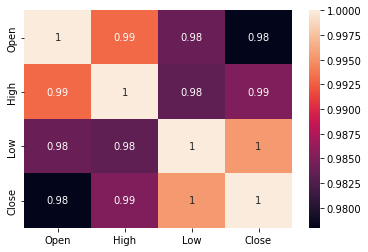

In [ ]:
##Plotting heatmap to show correlation
sns.heatmap(df_ybs.corr(),annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


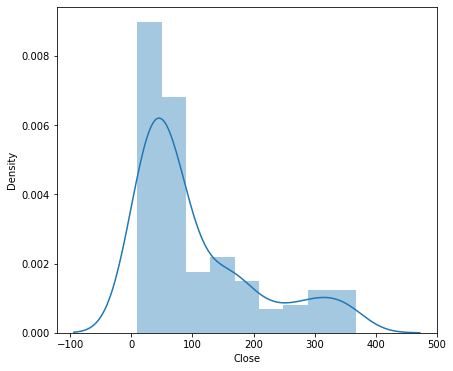

In [ ]:
##Graph showing close price distribuition
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df_ybs['Close'])



*   The observation made from this is that our data is rightly skewed.
*   Hence, we will do some log transformation.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


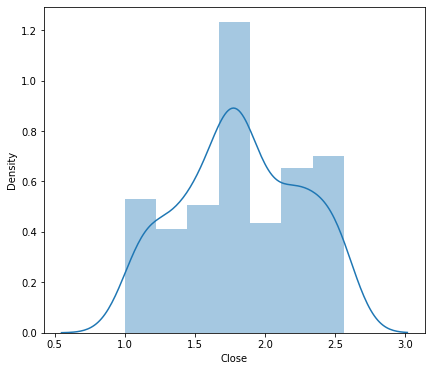

In [ ]:
##Using log10 transformation
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df_ybs["Close"]))

##**DATA TRANSFORMATION**

##Data splitting:
X= Independent variable

Y= Dependent variable

Normalization must be performed to make the data have same scale which further makes data easy to be processed.

In [ ]:
##Performing transformation
Y= df_ybs['Close']
X = df_ybs.drop(columns=['Close'])
  
from scipy.stats import zscore
X = X.apply(zscore)
Y = np.log10(Y)

##Splitting data into testing and training dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state = 1)

##Shape of trained data set
x_train.shape

(166, 3)

In [ ]:
##Splitting data into testing and training dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state = 1)

##Shape of trained data set
x_train.shape

(166, 3)

In [ ]:
##Shape of test data set
x_test.shape


(19, 3)

##**Linear Regression**

In [ ]:
##Calling Linear Regressor
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
##Training for accuracy
round(linear_regressor.score(x_train,y_train), 5)


0.81587

In [ ]:
##Testing for accuracy
round(linear_regressor.score(x_test,y_test), 5)


0.81711

In [ ]:
##Value prediction for test data set
y_prediction_train = linear_regressor.predict(x_train)
y_prediction_train


array([1.7666183 , 1.53168938, 1.4794963 , 1.83888527, 1.64446203,
       2.06074   , 1.48961781, 1.47688344, 1.61552908, 1.53518369,
       1.6671745 , 2.42998154, 2.75370696, 1.68110184, 2.3461793 ,
       1.78646439, 1.62461558, 2.3468333 , 1.63935779, 1.63737387,
       2.06644852, 2.79312933, 2.07213006, 1.52664993, 1.47388582,
       2.18643921, 1.97452121, 1.80939054, 1.63008982, 1.82587901,
       1.98180504, 2.31831807, 2.29187758, 1.97479277, 1.69764122,
       2.07099686, 1.4821111 , 1.59763084, 1.4572575 , 1.81687796,
       1.54343863, 1.59496715, 1.5415587 , 1.67370823, 1.56295198,
       2.75498342, 1.68352421, 1.47988525, 2.01043104, 2.11286981,
       1.8861321 , 1.84323144, 1.6799461 , 1.98611072, 1.48795528,
       2.07425224, 2.23696111, 1.47560025, 2.20555243, 1.52024132,
       2.64150939, 1.61983134, 2.71005441, 1.78052212, 1.87826092,
       1.47449564, 1.78711211, 2.14383496, 1.64082946, 1.5350653 ,
       1.47078143, 1.47292518, 1.64425389, 1.69087858, 2.43230

In [ ]:
##Test data set prediction
y_prediction_test = linear_regressor.predict(x_test)
y_prediction_test

array([1.51845969, 1.53262379, 1.63345439, 1.47552665, 2.01558401,
       2.73966496, 1.62402256, 1.52034916, 1.52252587, 1.62080897,
       2.07636188, 1.61608358, 1.47246835, 2.63727273, 1.70327549,
       1.60999233, 1.52591946, 1.95265184, 1.82762737])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559])

In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, y_prediction_test), 5))

MEAN SQUARED ERROR IS :-  0.03119


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, y_prediction_test)),5))

Root Mean Square Error :- 0.17662


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, y_prediction_test),5))

Mean Absolute Error :- 0.15245


In [ ]:
#R2 score of data set
print("R2 score :",round(r2_score(y_test, y_prediction_test), 5))

R2 score : 0.81711


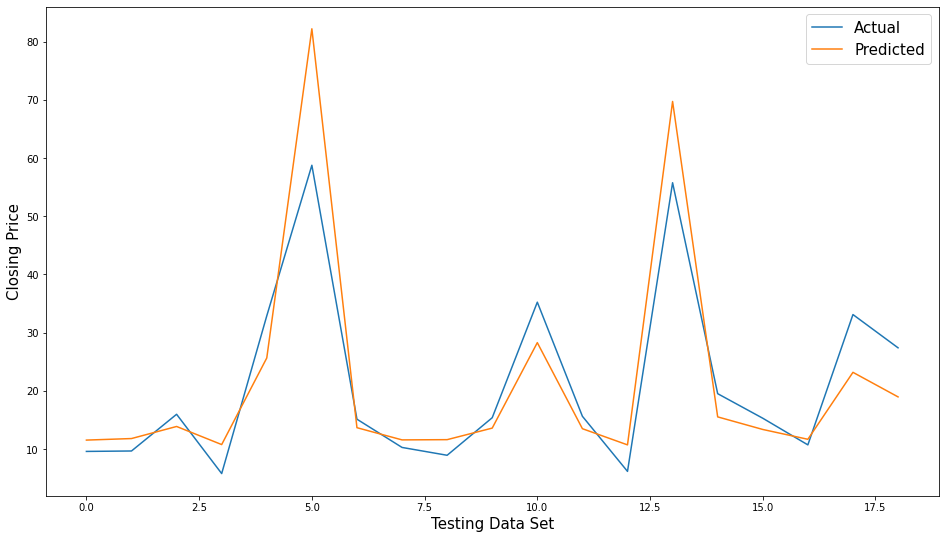

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(y_prediction_test))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)



##**Support Vector Machine**

In [ ]:
##Importing libraries
from sklearn.svm import SVR
regressor_svm = SVR(kernel='linear')
svm_model=regressor_svm.fit(x_train,y_train)

In [ ]:
svm_train_prediction_y = svm_model.predict(x_train)
svm_test_prediction_y = svm_model.predict(x_test)

In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, svm_test_prediction_y ), 5))

MEAN SQUARED ERROR IS :-  0.03575


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, svm_test_prediction_y)),5))

Root Mean Square Error :- 0.18907


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, svm_test_prediction_y),5))

Mean Absolute Error :- 0.15169


In [ ]:
#R2 score of data set
print("R2 score :",round(r2_score(y_test, svm_test_prediction_y), 5))

R2 score : 0.7904


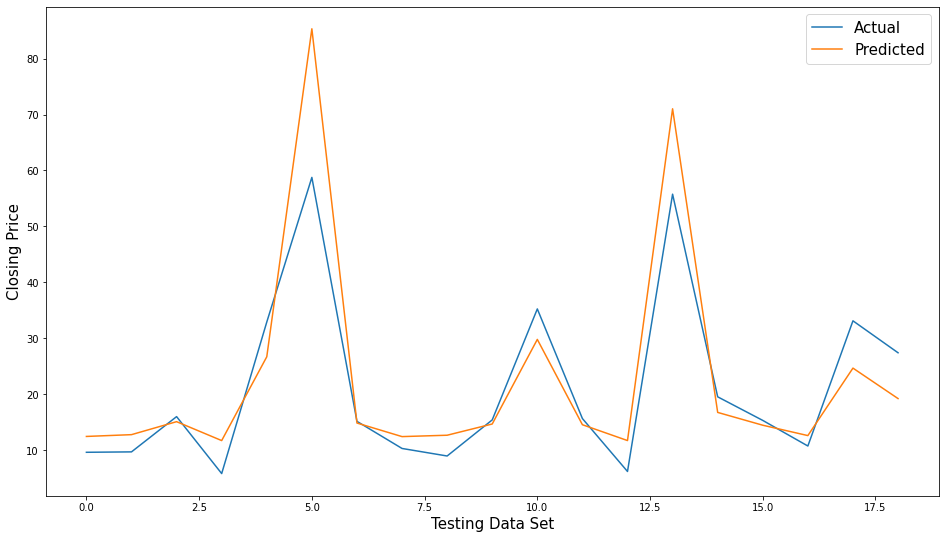

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(svm_test_prediction_y))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)

#**Ridge Regression**

In [ ]:
##Importing libraries
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

In [ ]:
ridge_regression_model = Ridge(alpha = 0.4)
ridge_regression_model.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
ridge_train_prediction_y=ridge_regression_model.predict(x_train)
ridge_test_prediction_y= ridge_regression_model.predict(x_test)

In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, ridge_test_prediction_y ), 5))

MEAN SQUARED ERROR IS :-  0.03137


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, ridge_test_prediction_y)),5))

Root Mean Square Error :- 0.17711


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, ridge_test_prediction_y),5))

Mean Absolute Error :- 0.15232


In [ ]:
#R2 score of data set
print("R2 score :",round(r2_score(y_test, ridge_test_prediction_y), 5))

R2 score : 0.81609


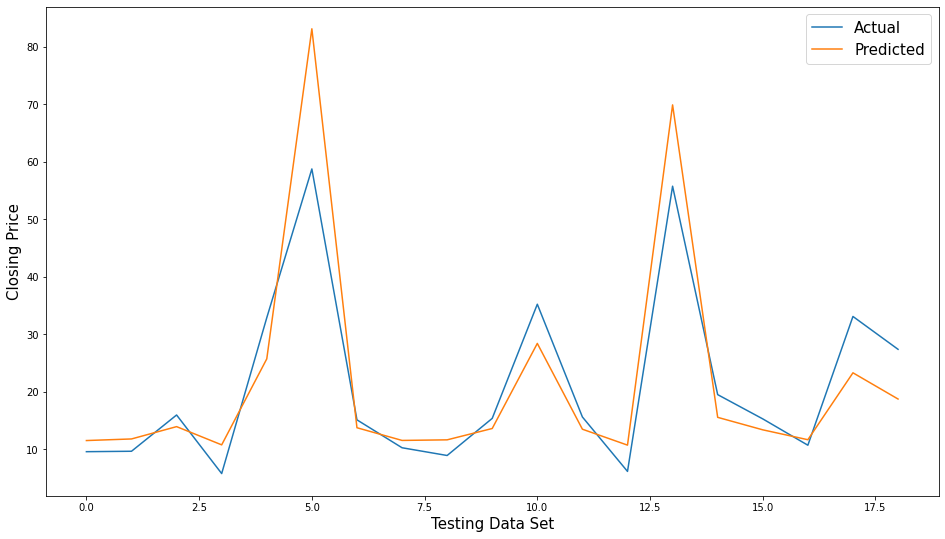

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(ridge_test_prediction_y))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)

##**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha=1)
lasso_reg_model = lasso_regression_model.fit(x_train,y_train)

In [ ]:
lasso_train_prediction_y= lasso_regression_model.predict(x_train)
lasso_test_prediction_y= lasso_regression_model.predict(x_test)

In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, lasso_test_prediction_y ), 5))

MEAN SQUARED ERROR IS :-  0.17777


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, lasso_test_prediction_y)),5))

Root Mean Square Error :- 0.42163


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, lasso_test_prediction_y),5))

Mean Absolute Error :- 0.3613


In [ ]:
print("R2 square :",round(r2_score(y_test, lasso_test_prediction_y), 5))

R2 square : -0.04228


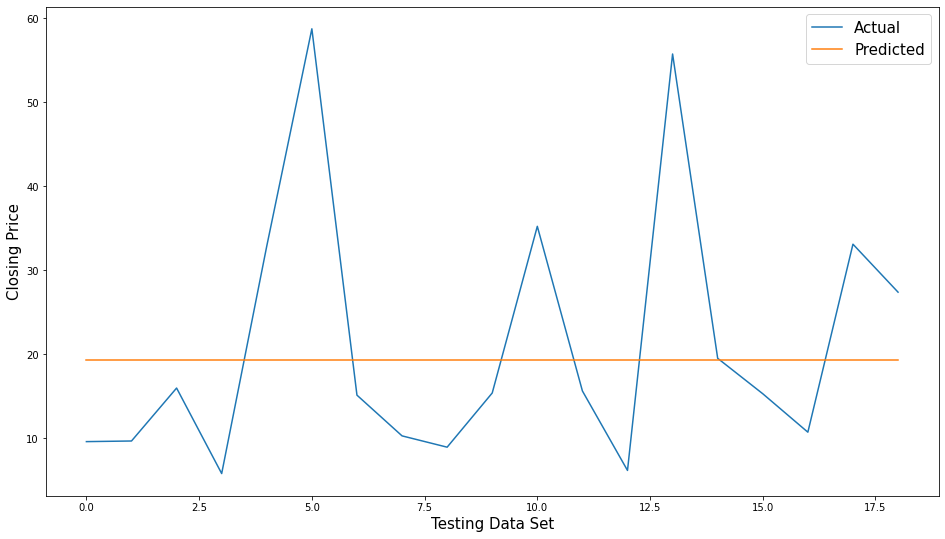

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(lasso_test_prediction_y))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)

##**K-nearest neighbors regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =3)

In [ ]:
knn_regression_model=knn_regressor.fit(x_train,y_train)

In [ ]:
knn_train_prediction_y = knn_regressor.predict(x_train)
knn_test_prediction_y = knn_regressor.predict(x_test)


In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, knn_test_prediction_y ), 5))

MEAN SQUARED ERROR IS :-  0.00153


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, knn_test_prediction_y)),5))


Root Mean Square Error :- 0.03915


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, knn_test_prediction_y),5))

Mean Absolute Error :- 0.0264


In [ ]:
print("R2 square :-",round(r2_score(y_test, knn_test_prediction_y), 5))


R2 square :- 0.99101


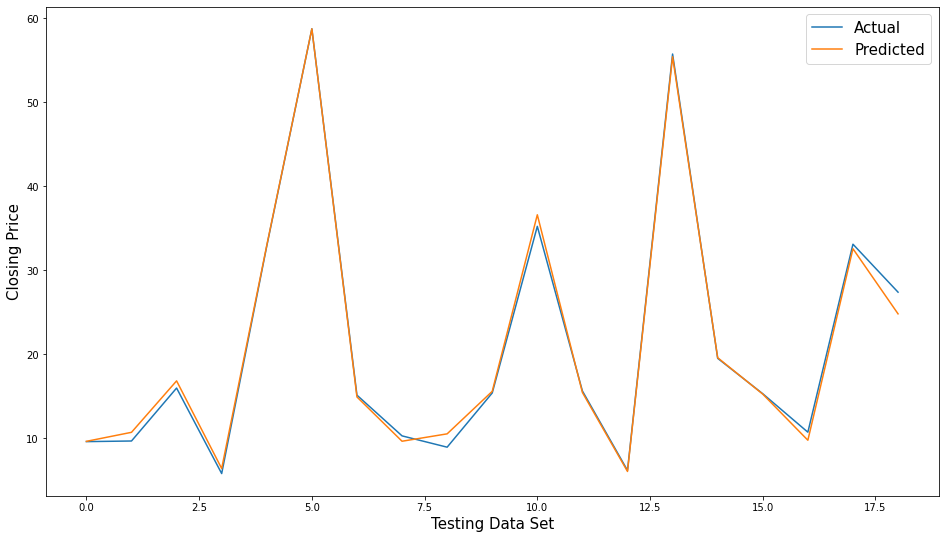

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(knn_test_prediction_y))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)

##**Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_regression = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_regression_model = elastic_regression.fit(x_train,y_train)

In [ ]:
elastic_train_prediction_y = elastic_regression.predict(x_train)
elastic_test_prediction_y = elastic_regression.predict(x_test)

In [ ]:
#Mean square error in data set
print("MEAN SQUARED ERROR IS :- ", round(mean_squared_error(y_test, elastic_test_prediction_y ), 5))

MEAN SQUARED ERROR IS :-  0.03562


In [ ]:
#Root mean square error in data set
print("Root Mean Square Error :-",round(math.sqrt(mean_squared_error(y_test, elastic_test_prediction_y)),5))

Root Mean Square Error :- 0.18874


In [ ]:
#Mean absolute error in data set
print("Mean Absolute Error :-",round(mean_absolute_error(y_test, elastic_test_prediction_y),5))

Mean Absolute Error :- 0.14992


In [ ]:
print("R2 square :-",round(r2_score(y_test, elastic_test_prediction_y), 5))

R2 square :- 0.79114


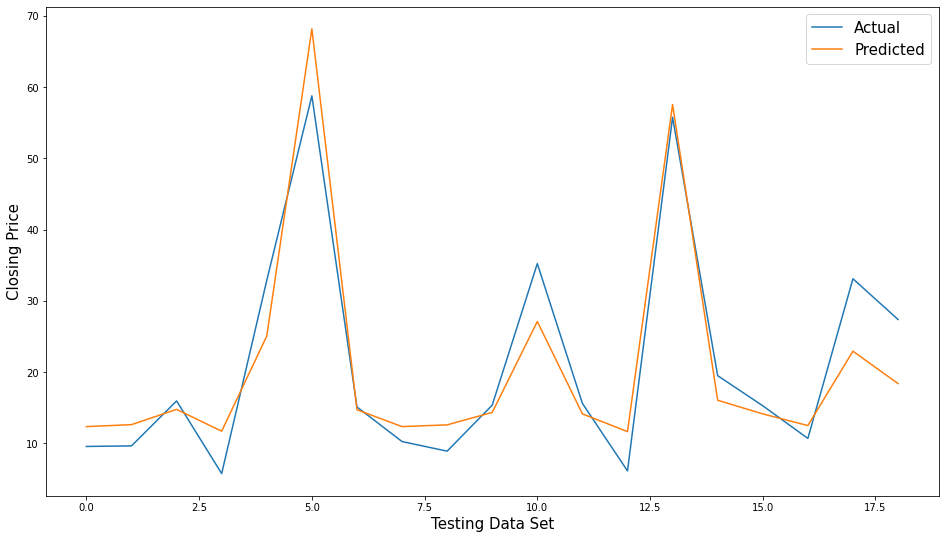

In [ ]:
##Plot for actual v/s predicted price
plt.figure(figsize=(16,9))
plt.plot(5**(np.array(y_test)))
plt.plot(5**(elastic_test_prediction_y))
plt.xlabel('Testing Data Set', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=15)

##**MODEL VISUALIZATION**

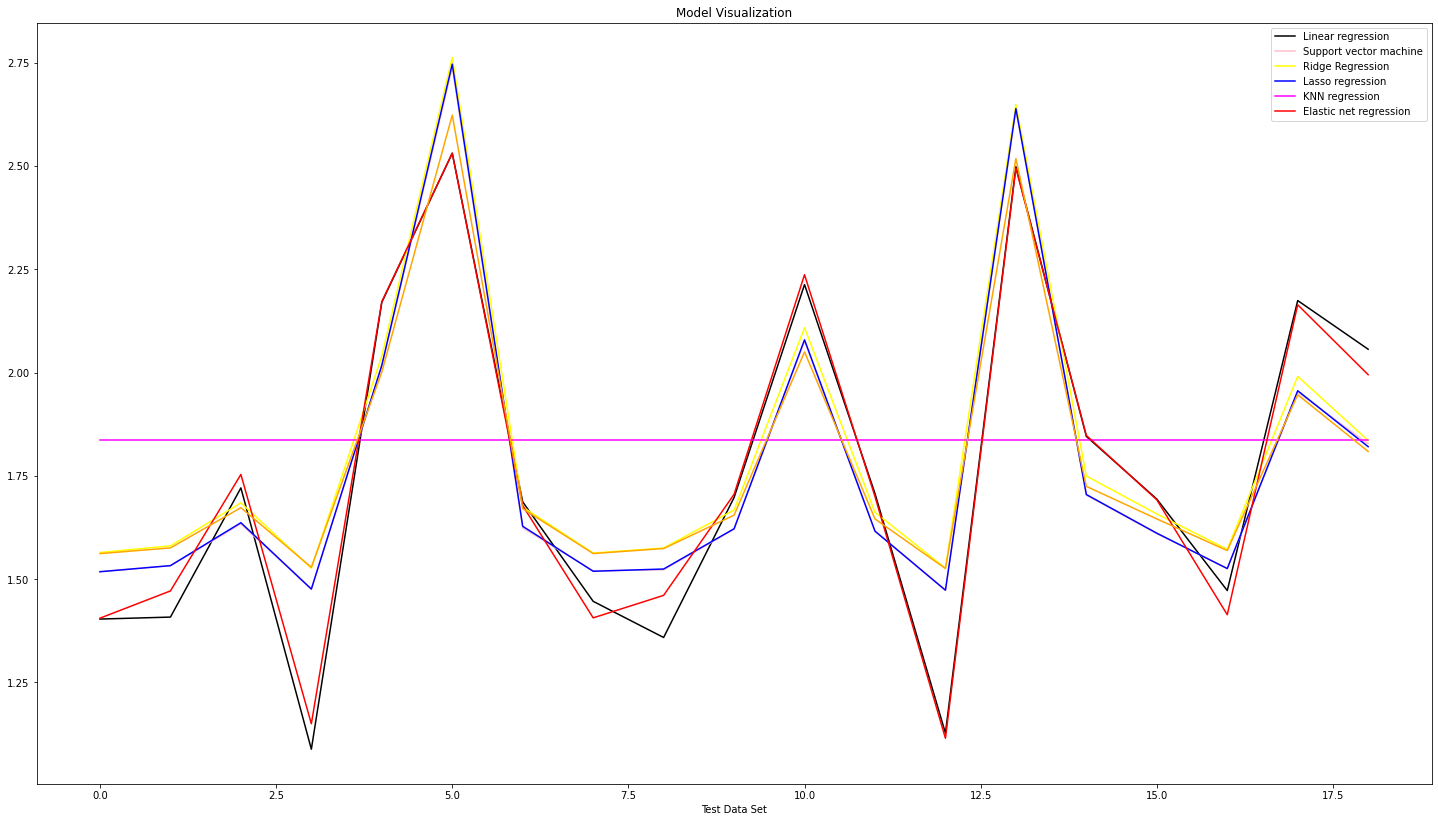

In [ ]:
##Plot showing all models visualization
plt.figure(figsize=(25,14))
plt.plot(np.array(y_test),color='black')
plt.plot(y_prediction_test,color='pink')##linear
plt.plot(svm_test_prediction_y,color='yellow')##svm
plt.plot(ridge_test_prediction_y,color='blue')##ridge
plt.plot(lasso_test_prediction_y,color='magenta')##lasso
plt.plot(knn_test_prediction_y,color='red')##knn
plt.plot(elastic_test_prediction_y,color='orange')##elastic net
plt.xlabel('Test Data Set')
plt.title('Model Visualization')
plt.legend(["Linear regression", "Support vector machine", "Ridge Regression", "Lasso regression", "KNN regression", "Elastic net regression"])

In [ ]:
##Import library
from sklearn.metrics import r2_score

In [ ]:
##Call functions for model accuracy
def error_matrix(y):
  mean_square_error= mean_squared_error(y_test,y)
  root_mean_square_error = np.sqrt(mean_square_error)
  r2_value = r2_score(y_test,y)
  other_r2 = 1-(1-r2_score(y_test,y))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
  return mean_square_error,root_mean_square_error,r2_value,other_r2

In [ ]:
##Checking accuracy and results
acc_list = ['Mean Square Error','Root Mean Square Error','Mean Absolute Error','R2']
df_accuracy = pd.DataFrame(index=acc_list)
df_accuracy['Linear Regression'] = error_matrix(y_prediction_test)
df_accuracy['Support Vector Machine'] = error_matrix(svm_test_prediction_y)
df_accuracy['Ridge Regression'] = error_matrix(ridge_test_prediction_y)
df_accuracy['Lasso Regression'] = error_matrix(lasso_test_prediction_y)
df_accuracy['K-Nearest Neighbour'] = error_matrix(knn_test_prediction_y)
df_accuracy['elastic test prediction'] = error_matrix(elastic_test_prediction_y)
df_ybs.swapaxes("index", "columns")
df_accuracy

,Linear Regression,Support Vector Machine,Ridge Regression,Lasso Regression,K-Nearest Neighbour,elastic test prediction
Mean Square Error,0.031193,0.035748,0.031368,0.177768,0.001532,0.035622
Root Mean Square Error,0.176616,0.189073,0.177109,0.421626,0.039147,0.188738
Mean Absolute Error,0.817110,0.790402,0.816087,-0.042280,0.991015,0.791144
R2,0.780533,0.748483,0.779304,-0.250735,0.989218,0.749373


##**CONCLUSIONS:**





1.   The mean square error values for linear regression, support vector machine, ridge regression and elastic test prediction were somewhat same. 

2.   The root mean square values of linear regression and ridge regression were somewhat same.

3.   Lasso regression gave highest mean square and highest root mean square value.

4.   While on the other hand lasso regression gave lowest mean absolute error an R2 score.

5.   The highest R2 value was of K-nearest neighbor as it gave 98% accuracy.

6.   Also, for mean absolute error K-nearest neighbor  gave the highest accuracy of 99%.

7.   Accuracy was mostly same in the case of elastic net regression and support vector machine.

8.   The maximum accuracy attained was 99%.